In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Campus Recruitment.csv to Campus Recruitment.csv


In [27]:
df = pd.read_csv('Campus Recruitment.csv')

df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [28]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [29]:
# Kolom numerik
num_cols = [
    'Nilai rata-rata SMP',
    'Nilai rata-rata SMA',
    'Nilai tes kemampuan kerja'
]

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Kolom kategorikal
df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-1875151907.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1875151907.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
ID,0
Jenis Kelamin,0
Nilai rata-rata SMP,0
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,0
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [30]:
le = LabelEncoder()

cat_cols = [
    'Jenis Kelamin',
    'Lembaga pendidikan kelas 10',
    'Lembaga pendidikan kelas 12',
    'Jurusan saat SMA',
    'Program studi sarjana',
    'Pengalaman kerja sebelum lulus',
    'Pendidikan pascasarjana',
    'status kelulusan (Bekerja/Belum)'
]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,2,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1,5400000.0
1,2,2,79.33,1,78.33,1,2,77.48,2,1,86.5,0,66.28,1,4000000.0
2,3,2,65.00,1,68.00,2,0,64.00,0,0,75.0,0,57.80,1,5000000.0
3,4,2,56.00,1,52.00,2,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,2,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50,1,8500000.0


In [31]:
X = df.drop(['ID', 'Gaji', 'status kelulusan (Bekerja/Belum)'], axis=1)
y = df['status kelulusan (Bekerja/Belum)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8604651162790697
[[ 9  3]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [33]:
feature_importance = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': lr.coef_[0]
}).sort_values(by='Koefisien', ascending=False)

feature_importance

,Fitur,Koefisien
8,Pengalaman kerja sebelum lulus,1.447074
0,Jenis Kelamin,0.551227
1,Nilai rata-rata SMP,0.264330
6,IPK,0.227297
3,Nilai rata-rata SMA,0.084985
9,Nilai tes kemampuan kerja,-0.040177
11,Nilai rata-rata pascasarjana,-0.259014
2,Lembaga pendidikan kelas 10,-0.383199
5,Jurusan saat SMA,-0.442992
7,Program studi sarjana,-0.492113


In [35]:
df['status kelulusan (Bekerja/Belum)'].value_counts()

,count
status kelulusan (Bekerja/Belum),
1,148
0,67


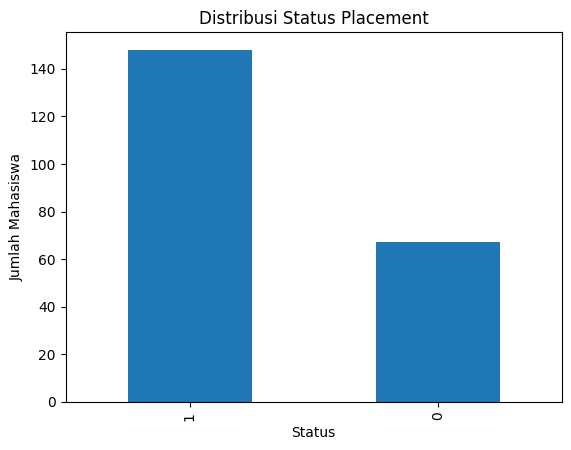

In [36]:
import matplotlib.pyplot as plt

df['status kelulusan (Bekerja/Belum)'].value_counts().plot(kind='bar')
plt.title('Distribusi Status Placement')
plt.xlabel('Status')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

In [37]:
df.corr()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
ID,1.000000,0.033482,-0.073770,0.083318,-0.084496,-0.001384,0.009955,-0.088281,0.025651,0.059151,0.061661,0.046630,0.022327,-0.026859,0.063764
Jenis Kelamin,0.033482,1.000000,-0.052539,-0.048746,-0.021265,-0.058168,0.093417,-0.165417,0.056365,0.084795,0.103546,-0.101735,-0.277464,0.082191,0.154776
Nilai rata-rata SMP,-0.073770,-0.052539,1.000000,-0.151330,0.506071,-0.195100,0.242813,0.522800,0.211051,0.178447,0.247386,-0.166066,0.383903,0.603199,0.024908
Lembaga pendidikan kelas 10,0.083318,-0.048746,-0.151330,1.000000,-0.222384,0.943515,-0.006684,-0.093707,0.040639,0.001223,-0.217707,0.039656,-0.131645,-0.237274,-0.150628
Nilai rata-rata SMA,-0.084496,-0.021265,0.506071,-0.222384,1.000000,-0.262623,-0.162061,0.433772,-0.085870,0.139840,0.238506,-0.240862,0.352518,0.490640,0.077593
Lembaga pendidikan kelas 12,-0.001384,-0.058168,-0.195100,0.943515,-0.262623,1.000000,-0.017497,-0.152712,0.032734,-0.051038,-0.232737,0.057244,-0.173568,-0.318705,-0.160042
Jurusan saat SMA,0.009955,0.093417,0.242813,-0.006684,-0.162061,-0.017497,1.000000,0.137276,0.596300,0.007856,0.087204,0.172107,0.039345,0.033442,0.074322
IPK,-0.088281,-0.165417,0.522800,-0.093707,0.433772,-0.152712,0.137276,1.000000,0.079317,0.122648,0.212629,-0.218286,0.402364,0.479861,-0.019272
Program studi sarjana,0.025651,0.056365,0.211051,0.040639,-0.085870,0.032734,0.596300,0.079317,1.000000,0.105816,0.025642,0.084361,0.116666,-0.020352,0.169655
Pengalaman kerja sebelum lulus,0.059151,0.084795,0.178447,0.001223,0.139840,-0.051038,0.007856,0.122648,0.105816,1.000000,0.039742,-0.191174,0.168811,0.276060,0.136920


In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.813953488372093
[[ 9  3]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.90      0.84      0.87        31

    accuracy                           0.81        43
   macro avg       0.77      0.79      0.78        43
weighted avg       0.83      0.81      0.82        43

